In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
def win_count(lst):
    p1_wins = 0
    p2_wins = 0
    ties = 0
    for x in lst:
        for y in x:
            if y == 1:
                p1_wins +=1
            elif y == -1:
                p2_wins += 1
            else:
                ties += 1
    return [p1_wins, p2_wins, ties]

In [22]:
class Dice:

    def dice_roll(self):
        roll = random.randint(1, 6)
        return roll

In [117]:
class Basic_Computer_Player:

    def __init__(self):
        pass

    def computer_roll(self):
        computer_dice = Dice()
        self.computer_curve = computer_dice.dice_roll()
        return self.computer_curve

    def hold_action(self):
        computer_choice = 'h'
        return computer_choice

    def computer_turn(self):
        computer_turn_bank = 0
        computer_to_roll = True
        while computer_to_roll == True:
            computer_roll_num = self.computer_roll()
            if computer_roll_num == 1:
                computer_turn_bank = 0
                computer_to_roll = False
                return computer_turn_bank
            else:
                computer_turn_bank += computer_roll_num
                computer_decision = self.hold_action()
                if computer_decision == 'h':
                    computer_to_roll = False
                    return computer_turn_bank
                else:
                    computer_to_roll = True
                    
                    
class Roll_Bot(Basic_Computer_Player):

    def computer_turn(self):
        computer_turn_bank = 0
        computer_to_roll = True
        roll_number = 0
        while computer_to_roll == True:
            computer_roll_num = self.computer_roll()
            roll_number += 1
            if computer_roll_num == 1:
                computer_turn_bank = 0
                computer_to_roll = False
                return computer_turn_bank
            else:
                computer_turn_bank += computer_roll_num
                if roll_number == 6:
                    computer_decision = "h"
                else:
                    computer_decision = "r"
                if computer_decision == 'h':
                    computer_to_roll = False
                    return computer_turn_bank
                else:
                    computer_to_roll = True
                    
class Bank_Bot(Basic_Computer_Player):
    
    def computer_turn(self):
        computer_turn_bank = 0
        computer_to_roll = True
        while computer_to_roll == True:
            computer_roll_num = self.computer_roll()
            if computer_roll_num == 1:
                computer_turn_bank = 0
                computer_to_roll = False
                return computer_turn_bank
            else:
                computer_turn_bank += computer_roll_num
                if computer_turn_bank >= 25:
                    computer_decision = "h"
                else:
                    computer_decision = "r"
                if computer_decision == 'h':
                    computer_to_roll = False
                    return computer_turn_bank
                else:
                    computer_to_roll = True

In [118]:
class Game:

    def __init__(self):
        self.computer1 = Roll_Bot()
        self.computer2 = Bank_Bot()

    def play_round(self):
        x = self.computer1.computer_turn()
        y = self.computer2.computer_turn()
        computer1_score = x
        computer2_score = y
        round_scores = [computer1_score, computer2_score]
        #print("1", computer1_score)
        #print("2", computer2_score)
        return round_scores
        
    def play_game(self):
        computer1_score = 0
        computer2_score = 0
        rounds_counter = 0
        while rounds_counter < 7:
            w = self.play_round()
            rounds_counter += 1
            computer1_score += w[0]
            computer2_score += w[1]
        #print(computer1_score, computer2_score)
        if computer1_score > computer2_score:
            return 1
        elif computer1_score < computer2_score:
            return -1
        else:
            return 0
        
    def play_n_games(self, num=3):
        return [self.play_game() for _ in range(num)]
    
    def run_n_trials(self, trials=4, num=3):
        return [self.play_n_games(num) for _ in range(trials)]

In [119]:
game = Game()

In [9]:
trial_results = game.run_n_trials(1000, 100)
win_results = win_count(trial_results)

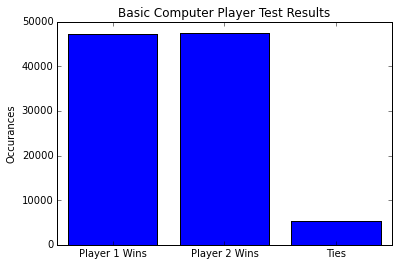

In [11]:
x1 = ["Player 1 Wins", "Player 2 Wins", "Ties"]
plt.bar(range(len(win_results)), win_results, align='center')
plt.xticks(range(len(win_results)), x1)
plt.title("Basic Computer Player Test Results")
plt.ylabel("Occurances")
plt.show()

This is a test of my Basic_Computer_Player class, where both players in the game are from this class. The bot here only rolls one time, then holds. The results show, through 1,000 trials of 100 games each, that no player has any real advantage. This is not surprising since the result is basically dependent on the luck of the first roll.

In [41]:
one_smart_bot_results = game.run_n_trials(1000, 100)
one_smart_bot_wins = win_count(one_smart_bot_results)

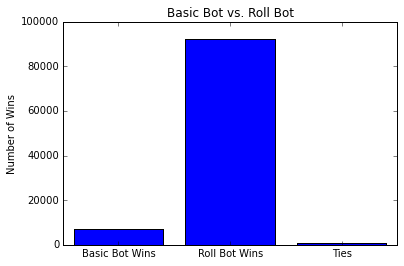

In [43]:
x1 = ["Basic Bot Wins", "Roll Bot Wins", "Ties"]
plt.bar(range(len(one_smart_bot_wins)), one_smart_bot_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Basic Bot vs. Roll Bot")
plt.ylabel("Number of Wins")
plt.show()

In this graph, we can see that my Roll Bot utterly destroyed my Basic Bot.  Here, the Roll Bot is instructed not to "hold" until the third roll.  This small change from Basic Bot, which is instructed to only roll once, had a giant impact.  This eliminated most ties, and Roll Bot wins most of the time.  Very pleased with this result. 

In [59]:
bank_bot_basic_bot_results = game.run_n_trials(1000, 100)
bank_bot_basic_bot_wins = win_count(bank_bot_basic_bot_results)

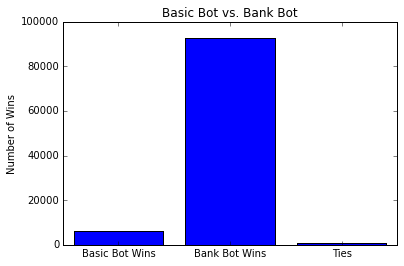

In [60]:
x1 = ["Basic Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(bank_bot_basic_bot_wins)), bank_bot_basic_bot_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Basic Bot vs. Bank Bot")
plt.ylabel("Number of Wins")
plt.show()

In this graph, you can see that my Basic Bot was destroyed, again.  The Bank Bot is instructed to "hold" only after the turn score is 10 or above.  This, again, eliminated almost all ties, as well as winning almost every game.

In [63]:
both_smart_bots_results = game.run_n_trials(1000, 100)
both_smart_bots_wins = win_count(both_smart_bots_results)

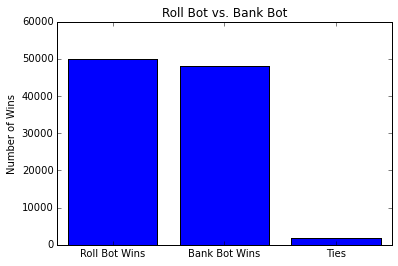

In [64]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_bots_wins)), both_smart_bots_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot")
plt.ylabel("Number of Wins")
plt.show()

This result was a lot closer than I had anticipated.  I genuinely thought that the Roll Bot would have a larger margin of wins, but this ended up being close.  The Roll Bot was again instructed to "hold" after the third roll, and the Bank Bot was again instructed not to "hold" until after the turn score was greater than 10.  What this graph is telling me is that while the number of rolls and turn score are important, the difference between the two is not very much.  Further testing is needed.

In [68]:
both_smart_2 = game.run_n_trials(1000, 100)
both_smart_2_wins = win_count(both_smart_2)

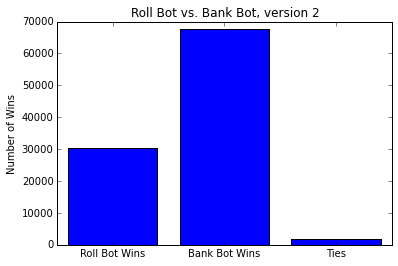

In [74]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_2_wins)), both_smart_2_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 2")
plt.ylabel("Number of Wins")
plt.show()

This result was interesting.  For this test, Bank Bot's instruction remained the same ("hold" only after turn score is 10 or more), while Roll Bot was instructed to "hold" after 2 turns.  The result was Bank Bot winning more that two-times as much.  Very interesting result.

In [73]:
both_smart_3 = game.run_n_trials(1000, 100)
both_smart_3_wins = win_count(both_smart_3)

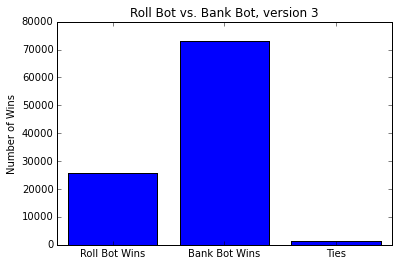

In [75]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_3_wins)), both_smart_3_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 3")
plt.ylabel("Number of Wins")
plt.show()

For this test, Roll Bot remained holding after the second roll, but I altered Bank Bot's instructions to hold only after the turn score was 15 or more.  The result was Bank bot winning right at almost three-times the rate.  Bank Bot won more games than in version 2, and Roll Bot lost more than in version 2.  More testing is coming.

In [79]:
both_smart_4 = game.run_n_trials(1000, 100)
both_smart_4_wins = win_count(both_smart_4)

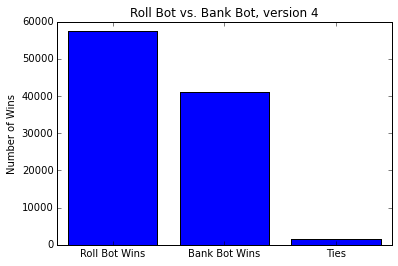

In [80]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_4_wins)), both_smart_4_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 4")
plt.ylabel("Number of Wins")
plt.show()

In [84]:
both_smart_5 = game.run_n_trials(1000, 100)
both_smart_5_wins = win_count(both_smart_5)

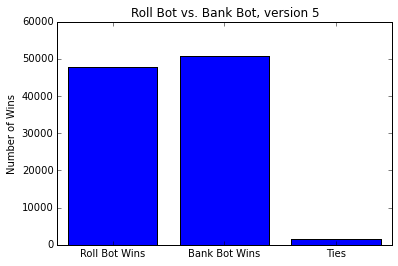

In [85]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_5_wins)), both_smart_5_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 5")
plt.ylabel("Number of Wins")
plt.show()

This test left Roll Bot's instructions the same as version 4 (holding on roll 4), but I changed Bank Bot's instructions back to holding after the turn score is 15 or more.  The result was close, but Bank Bot wins more.  It is still very close.  For all further testing, Bank Bot's instructions will remain to only hold after the turn score is 15 or more, unless otherwise specified.

In [89]:
both_smart_6 = game.run_n_trials(1000, 100)
both_smart_6_wins = win_count(both_smart_6)

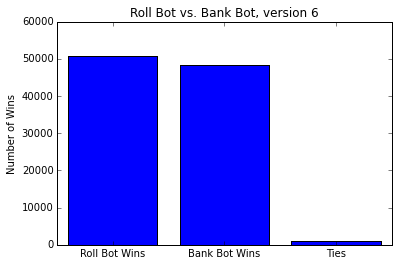

In [90]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_6_wins)), both_smart_6_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 6")
plt.ylabel("Number of Wins")
plt.show()

For this test, Roll Bot was instructed to only hold after the fifth roll. This basically evened the two bots out.  It is almost at 50% wins for each bot.  Will test more.

In [94]:
both_smart_7 = game.run_n_trials(1000, 100)
both_smart_7_wins = win_count(both_smart_7)

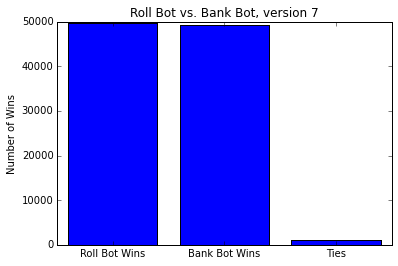

In [95]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_7_wins)), both_smart_7_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 7")
plt.ylabel("Number of Wins")
plt.show()

For this test, Roll Bot's instructions were altered to where it was only holding on the sixth turn.  This got the win percentage for each bot even closer to an even 50/50.  Will test more.

In [99]:
both_smart_8 = game.run_n_trials(1000, 100)
both_smart_8_wins = win_count(both_smart_8)

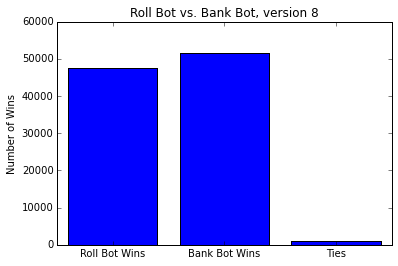

In [100]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_8_wins)), both_smart_8_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 8")
plt.ylabel("Number of Wins")
plt.show()

For this test, Roll Bot was instructed to hold after the 7th roll.  As you can see, Roll Bot's wins have started to decline, making the upper limit on number of rolls 6.  More testing required.

In [104]:
both_smart_9 = game.run_n_trials(1000, 100)
both_smart_9_wins = win_count(both_smart_9)

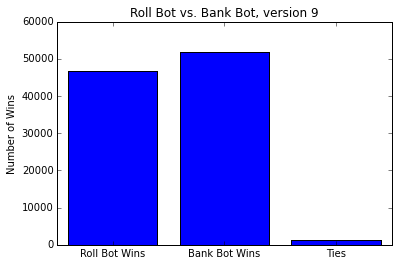

In [105]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_9_wins)), both_smart_9_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 9")
plt.ylabel("Number of Wins")
plt.show()

In this test, Roll Bot holds on the 5th roll, and Bank Bot holds when the turn score is 20 or more.  This is still too close to call.  Need more testing

In [109]:
both_smart_10 = game.run_n_trials(1000, 100)
both_smart_10_wins = win_count(both_smart_10)

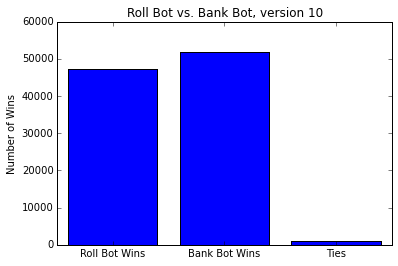

In [110]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_10_wins)), both_smart_10_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 10")
plt.ylabel("Number of Wins")
plt.show()

I beleive this to be the tell-tale test.  I left Bank Bot's instructions at holding when the turn score is 20 or more, but I moved Roll Bot's instructions to hold after the 4th turn.  While the margin is similar, Bank Bot is winning more games.  Bank Bot seems to be my most efficient bot.  One more test to follow.

In [114]:
both_smart_11 = game.run_n_trials(1000, 100)
both_smart_11_wins = win_count(both_smart_11)

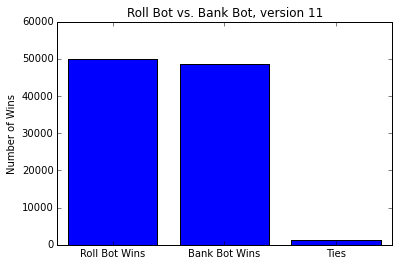

In [115]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_11_wins)), both_smart_11_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 11")
plt.ylabel("Number of Wins")
plt.show()

Just when I think I have it figured out, it all changes.  By changing the Roll Bot's instructions back to holding after the 6th roll, it is now winning more, even though it's by a small margin.

In [120]:
both_smart_12 = game.run_n_trials(1000, 100)
both_smart_12_wins = win_count(both_smart_12)

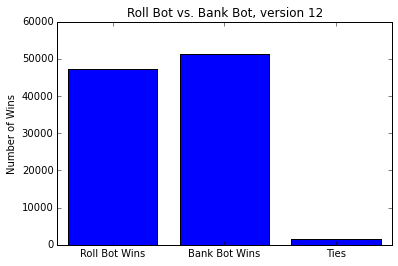

In [121]:
x1 = ["Roll Bot Wins", "Bank Bot Wins", "Ties"]
plt.bar(range(len(both_smart_12_wins)), both_smart_12_wins, align='center')
plt.xticks(range(len(one_smart_bot_wins)), x1)
plt.title("Roll Bot vs. Bank Bot, version 12")
plt.ylabel("Number of Wins")
plt.show()

In this test, Roll Bot remained holding at roll 6, but Bank Bot was instructed to hold only once the turn score was 25 or greater.  Knowing this, the bank-hold condition is clearly superior.  Further tests will be between bots with the bank-hold condition.